In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

plt.style.use(['science', 'retro', 'grid'])

import sys
import cvxopt as opt
sys.path.insert(0, os.path.abspath('../../src/rl/gaussian/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))

In [91]:
import importlib
importlib.reload(sys.modules['EfficientFrontier'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['Harness'])
importlib.reload(sys.modules['ParallelRunner'])
importlib.reload(sys.modules['GaussianPolicy'])

<module 'GaussianPolicy' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/gaussian/GaussianPolicy.py'>

In [92]:
from GenerativeMarketEnv import GenerativeMarketEnv
from GaussianPolicy import GaussianPolicy
from Harness import Harness
from ParallelRunner import ParallelRunner
from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

In [56]:
stocks = ['AAPL' ,'ADBE' ,'ADI' ,'ADP' ,'ADSK' ,'AEP' ,'ALGN' ,'ALXN' ,'AMAT' ,'AMD' ,'AMGN' ,'AMZN' ,'ANSS' ,'ASML' ,'ATVI'
 ,'AVGO' ,'BIDU' ,'BIIB' ,'BKNG' ,'CDNS' ,'CDW' ,'CERN' ,'CHKP' ,'CHTR' ,'CMCSA' ,'COST' ,'CPRT' ,'CSCO' ,'CSX' ,'CTAS'
 ,'CTSH' ,'DLTR' ,'DOCU' ,'DXCM' ,'EA' ,'EBAY' ,'EXC' ,'FAST' ,'FB' ,'FISV' ,'FOX' ,'FOXA' ,'GILD' ,'GOOG' ,'GOOGL'
 ,'IDXX' ,'ILMN' ,'INCY' ,'INTC' ,'INTU' ,'ISRG' ,'JD' ,'KDP' ,'KHC' ,'KLAC' ,'LRCX' ,'LULU' ,'MAR' ,'MCHP' ,'MDLZ'
 ,'MELI' ,'MNST' ,'MRNA' ,'MRVL' ,'MSFT' ,'MTCH' ,'MU' ,'MXIM' ,'NFLX' ,'NTES' ,'NVDA' ,'NXPI' ,'OKTA' ,'ORLY' ,'PAYX'
 ,'PCAR' ,'PDD' ,'PEP' ,'PTON' ,'PYPL' ,'QCOM' ,'REGN' ,'ROST' ,'SBUX' ,'SGEN' ,'SIRI' ,'SNPS' ,'SPLK' ,'SWKS' ,'TCOM'
 ,'TEAM' ,'TMUS' ,'TSLA' ,'TXN' ,'VRSK' ,'VRSN' ,'VRTX' ,'WBA' ,'WDAY' ,'XEL' ,'XLNX' ,'ZM']

In [19]:
random.shuffle(stocks)
sampled_stocks_10 = stocks[:10]

[*********************100%***********************]  10 of 10 completed


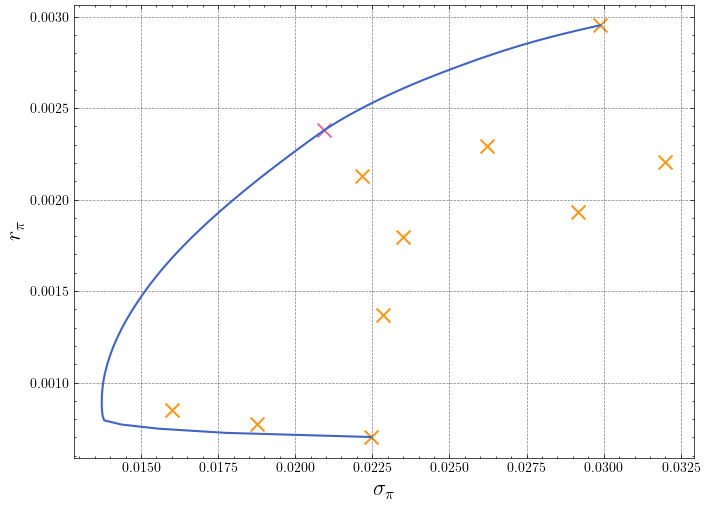

0.11359299794102125

In [20]:
factory = MarketFactory(sampled_stocks_10, "2019-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [32]:
params = {
    'n_assets': len(sampled_stocks_10),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3042.22it/s]
1it [00:08,  8.23s/it]


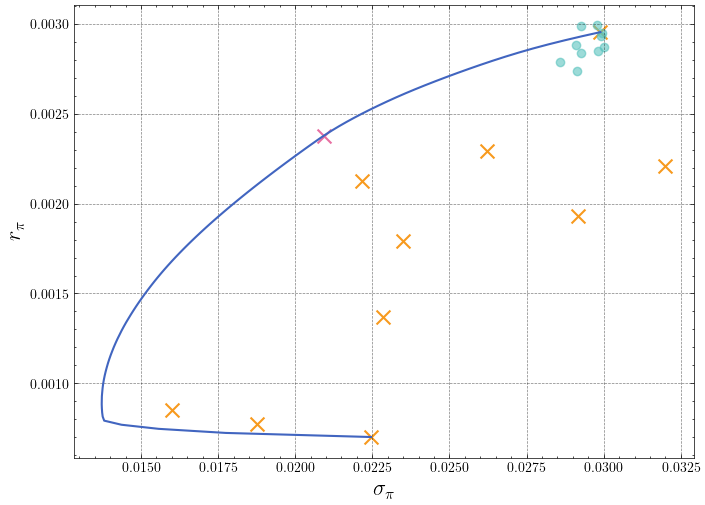

0.11359299794102125

In [33]:
market.plot_efficient_frontier(stds = stds, returns = means)

## 15 Stocks 

[*********************100%***********************]  15 of 15 completed


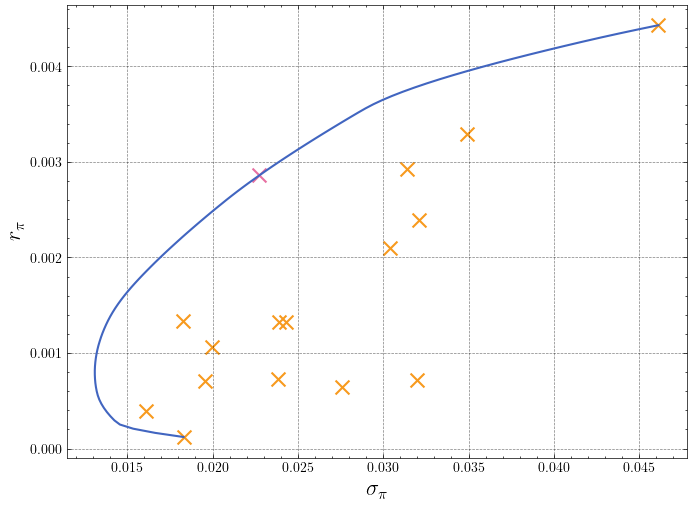

0.12571993399437173

In [35]:
random.shuffle(stocks)
sampled_stocks_15 = stocks[:15]
factory = MarketFactory(sampled_stocks_15, "2019-04-30", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [36]:
params = {
    'n_assets': len(sampled_stocks_15),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 74.94it/s]
1it [00:12, 12.35s/it]


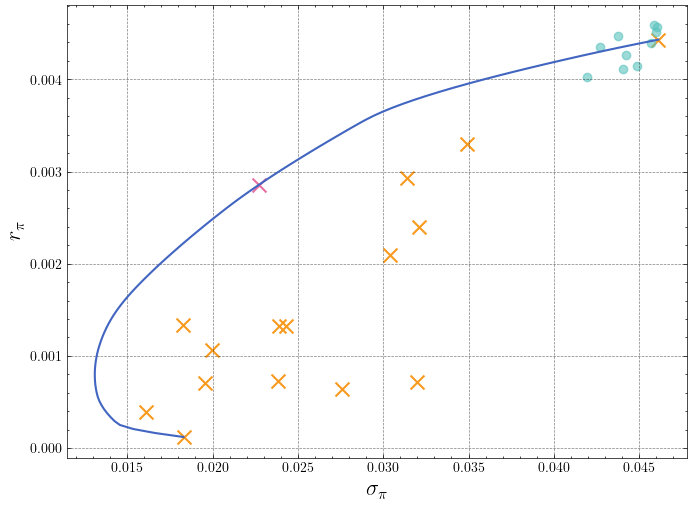

0.12571993399437173

In [37]:
market.plot_efficient_frontier(stds = stds, returns = means)

## 25 Stocks

[*********************100%***********************]  25 of 25 completed


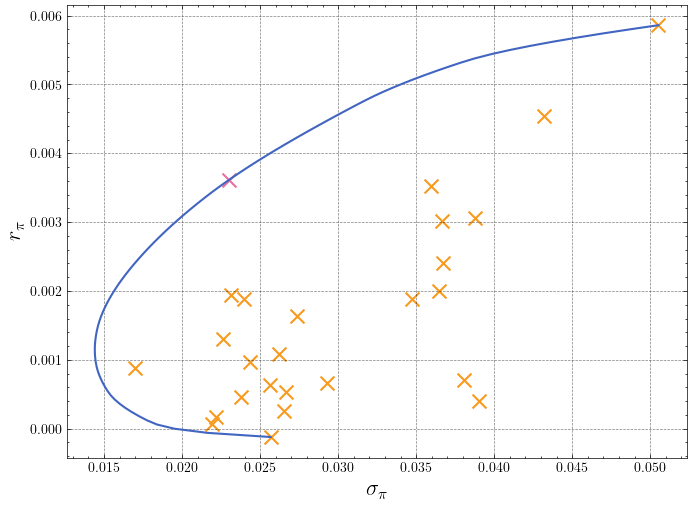

0.1570974494275211

In [43]:
random.shuffle(stocks)
sampled_stocks = stocks[:25]
factory = MarketFactory(sampled_stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [44]:
params = {
    'n_assets': len(sampled_stocks),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 4428.58it/s]
1it [00:10, 10.93s/it]


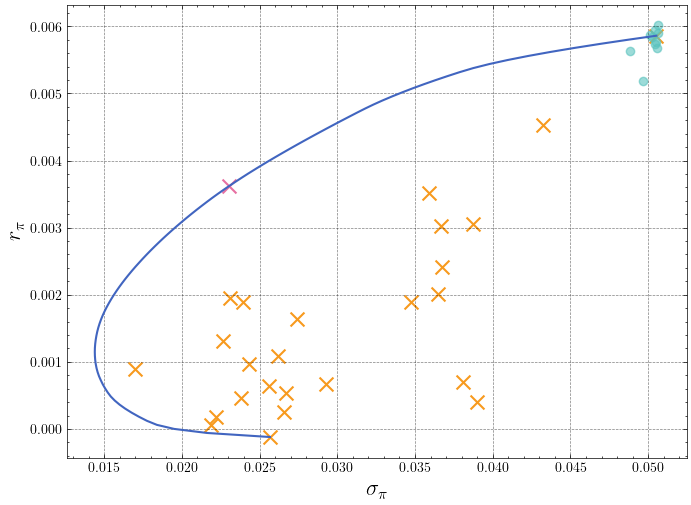

0.1570974494275211

In [46]:
market.plot_efficient_frontier(stds = stds, returns = means)

## 50 Stocks

[*********************100%***********************]  50 of 50 completed


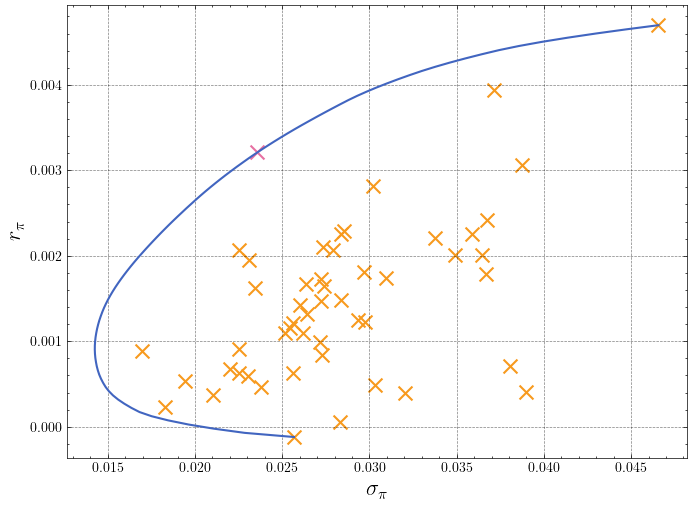

0.13612337325533627

In [47]:
random.shuffle(stocks)
sampled_stocks = stocks[:50]
factory = MarketFactory(sampled_stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [48]:
params = {
    'n_assets': len(sampled_stocks),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3533.83it/s]
1it [00:18, 18.64s/it]


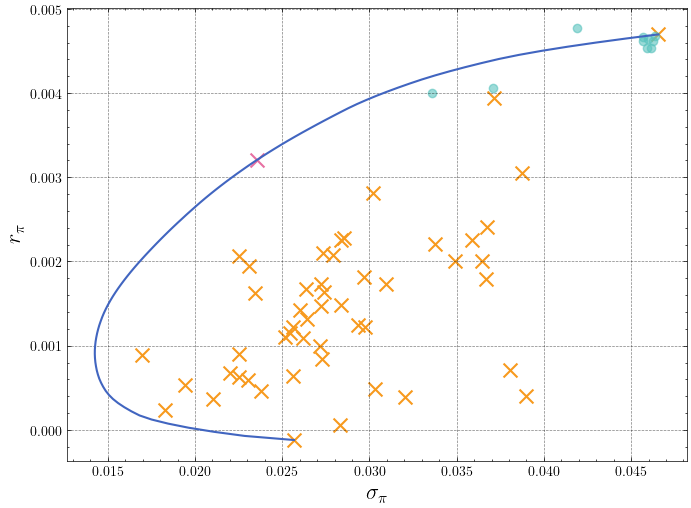

0.13612337325533627

In [49]:
market.plot_efficient_frontier(stds = stds, returns = means)

## 100 Stocks

[*********************100%***********************]  100 of 100 completed


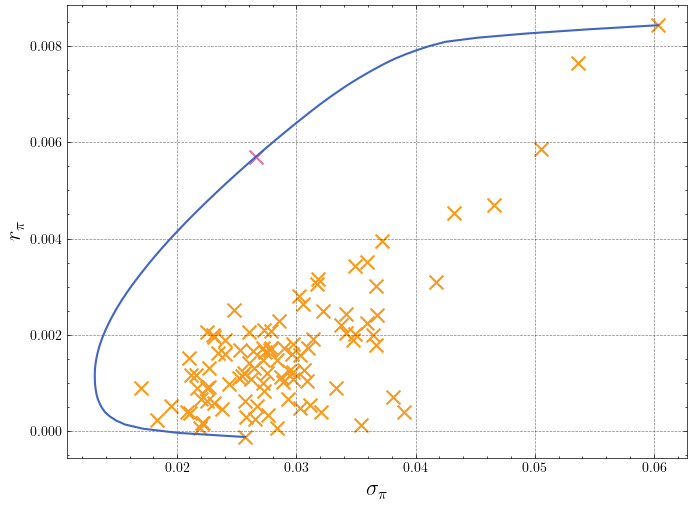

0.21426938441309923

In [50]:
random.shuffle(stocks)
sampled_stocks = stocks[:100]
factory = MarketFactory(sampled_stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [51]:
params = {
    'n_assets': len(sampled_stocks),
    'α_μ': 1,
    'α_σ': 1e-10,
    'γ': 0.1,
    'eps': 2000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 4124.19it/s]
1it [00:35, 35.92s/it]


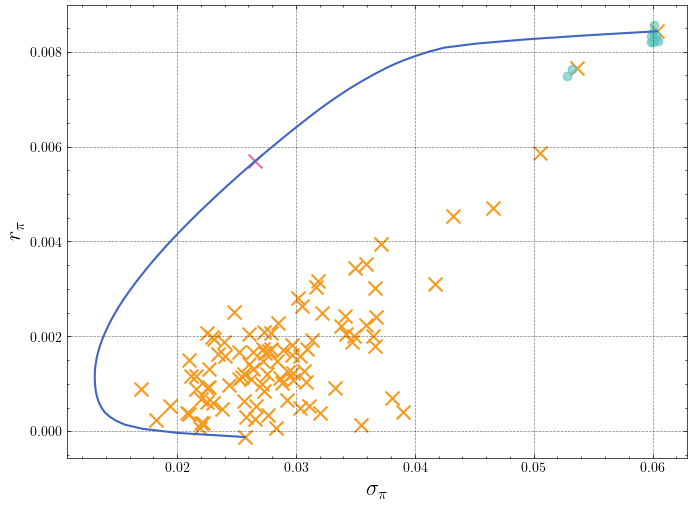

0.21426938441309923

In [52]:
market.plot_efficient_frontier(stds = stds, returns = means)

# DSR 

[*********************100%***********************]  10 of 10 completed


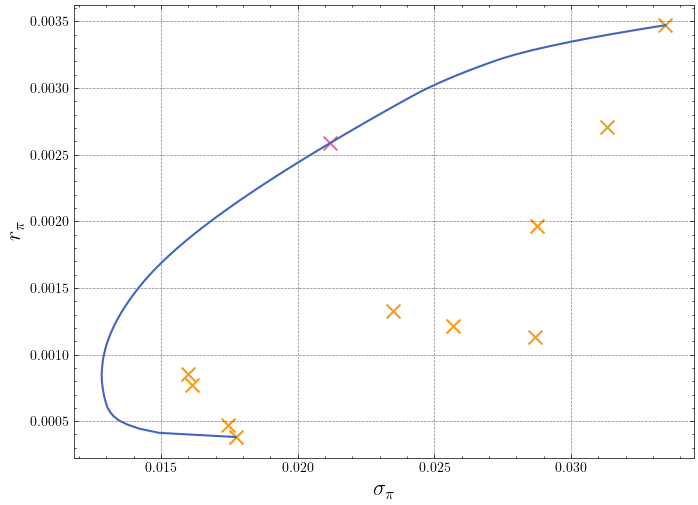

0.12207441726914738

In [57]:
random.shuffle(stocks)
sampled_stocks = stocks[:10]
factory = MarketFactory(sampled_stocks, "2019-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [101]:
params = {
    'n_assets': len(sampled_stocks_10),
    'α_μ': 5e-4,
    'α_σ': 1e-7,
    'γ': 0.1,
    'eps': 8000
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 100, reward_mode='dsr', η=0.05)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 43.93it/s]
1it [01:54, 114.42s/it]


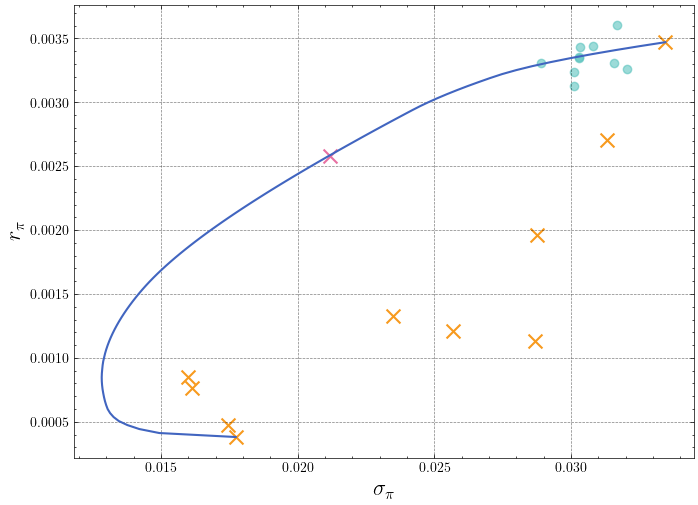

0.12207441726914738

In [100]:
market.plot_efficient_frontier(stds = stds, returns = means)

In [107]:
bool([False])

True